# Statystyki dotyczące meczów piłki nożnej

In [28]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [29]:
data = pd.read_csv('soccer.csv', sep = ';', encoding="utf-8-sig")
data.head()

,Date,Player ID,Player Surname,Player Forename,Team,Team Id,Opposition,Opposition id,Venue,Position Id,...,Pass Left,Pass Right,Unsuccessful Ball Touch,Successful Ball Touch,Take-Ons Overrun,CompId,SeasId,Touches open play final third,Touches open play opp box,Touches open play opp six yards
0,2012-04-28,28566,Abou Diaby,Vassiriki,Arsenal,3,Stoke City,110,Away,4,...,2,4,0,0,0,8,2011,2,1,0
1,2011-11-26,28566,Abou Diaby,Vassiriki,Arsenal,3,Fulham,54,Home,4,...,5,7,0,0,0,8,2011,11,1,0
2,2012-03-03,28566,Abou Diaby,Vassiriki,Arsenal,3,Liverpool,14,Away,4,...,5,3,2,0,0,8,2011,4,0,0
3,2012-04-21,28566,Abou Diaby,Vassiriki,Arsenal,3,Chelsea,8,Home,4,...,6,9,0,0,0,8,2011,8,1,0
4,2012-01-03,20208,Adam,Charlie,Liverpool,14,Manchester City,43,Away,4,...,13,12,0,4,0,8,2011,16,3,0


In [3]:
#zestawienie danych

In [30]:
print("Jest", data['Team'].unique().size, "różnych drużyn")
print("W których gra ", data['Player ID'].unique().size, " różnych zawdoników")
print("Łącznie mamy ", data['Date'].size, "rekordów") 

Jest 20 różnych drużyn
W których gra  539  różnych zawdoników
Łącznie mamy  10369 rekordów


In [31]:
team_player = data.iloc[:,[2,3,4]]

#grupujemy po nazwie druzyny i zawodnikach, otrzymujemy unique wartości dla drużyny i graczy
team_player = team_player.groupby(['Team', 'Player Surname', 'Player Forename']).size().reset_index()

#liczymy ile graczy jest w poszczególnej drużynie
team_player = team_player.groupby('Team').size()

print("Nazwy drużyn z liczbą graczy: \n", team_player)



Nazwy drużyn z liczbą graczy: 
 Team
Arsenal                    29
Aston Villa                27
Blackburn Rovers           27
Bolton Wanderers           26
Chelsea                    26
Everton                    30
Fulham                     27
Liverpool                  22
Manchester City            21
Manchester United          25
Newcastle United           21
Norwich City               25
Queens Park Rangers        33
Stoke City                 23
Sunderland                 26
Swansea City               25
Tottenham Hotspur          28
West Bromwich Albion       24
Wigan Athletic             20
Wolverhampton Wanderers    32
dtype: int64


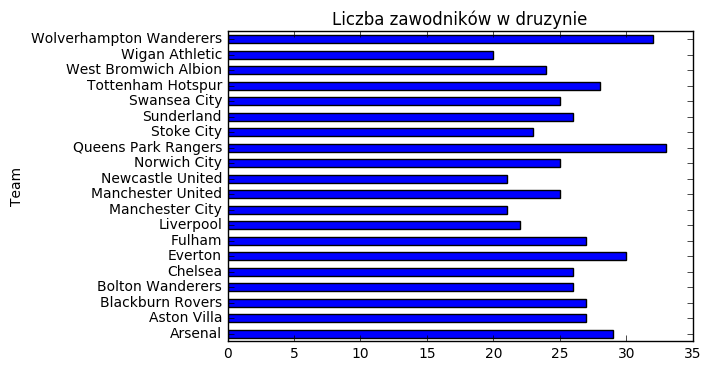

In [32]:
#wykres - liczba zawodników w każdej drużynie

team_player.plot(kind ='barh', title='Liczba zawodników w druzynie')

In [7]:
#wsyiągnięcie column : Date, Team, Opposition, Venue, Winning Goal
team_match = data.iloc[:,[0,1,4,6,8,15,17]]

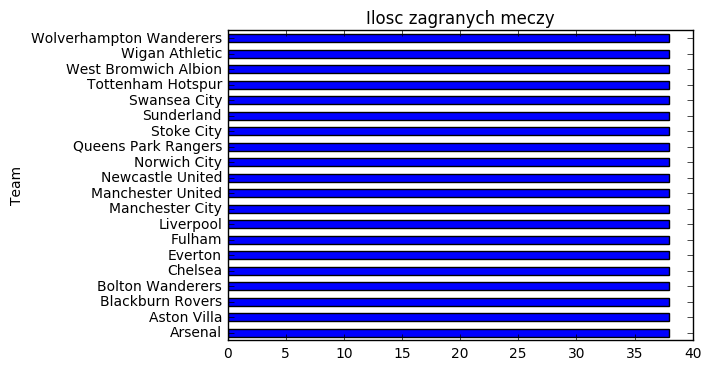

In [8]:
#zagrane mecze

team_games = team_match.groupby(['Date','Team']).size().reset_index()
team_games = team_games.groupby('Team').size()
team_games.plot(kind ='barh', title='Ilosc zagranych meczy')

In [9]:
#przegrane/wygrane mecze

team_win = team_match.groupby(['Date','Team','Winning Goal']).size().reset_index()
team_win = team_win.groupby(['Team','Winning Goal']).size().unstack('Winning Goal')
team_win.columns=['Przegrane','Wygrane']
team_win['Przegrane'] = team_win['Przegrane'] - team_win['Wygrane']
print(team_win)

                         Przegrane  Wygrane
Team                                       
Arsenal                         17       21
Aston Villa                     31        7
Blackburn Rovers                32        6
Bolton Wanderers                28       10
Chelsea                         20       18
Everton                         23       15
Fulham                          26       12
Liverpool                       25       13
Manchester City                 11       27
Manchester United               12       26
Newcastle United                20       18
Norwich City                    26       12
Queens Park Rangers             28       10
Stoke City                      27       11
Sunderland                      27       11
Swansea City                    26       12
Tottenham Hotspur               18       20
West Bromwich Albion            26       12
Wigan Athletic                  27       11
Wolverhampton Wanderers         33        5


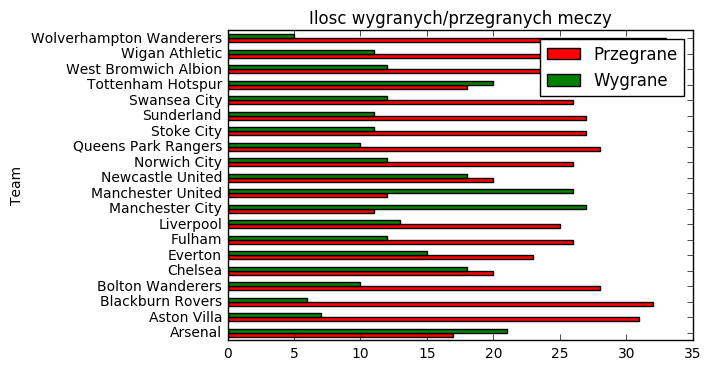

In [10]:
team_win.plot(kind ='barh',color = ['r','g'], title='Ilosc wygranych/przegranych meczy')

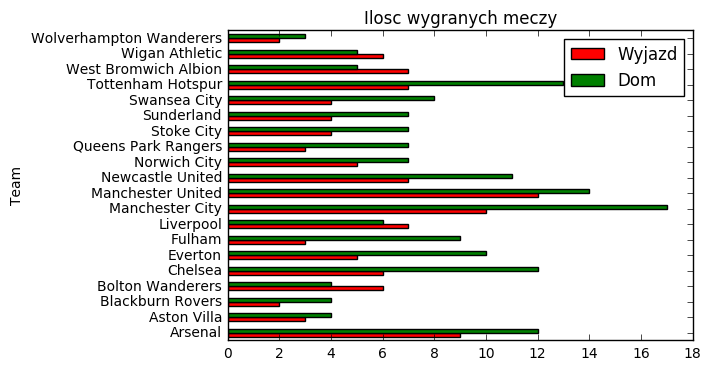

In [11]:
#wygrane na wyjeździe/ w domu
team_ven = team_match.groupby(['Date','Team','Winning Goal','Venue']).size().reset_index()
team_ven = team_ven.groupby(['Team','Venue','Winning Goal']).size().unstack(['Winning Goal','Venue']).reset_index()
team_ven.columns=['Team',' ','Wyjazd',' ','Dom']
team_ven = team_ven.iloc[:,[0,2,4]]

team_ven.set_index('Team').plot(kind ='barh',color = ['r','g'], title='Ilosc wygranych meczy')

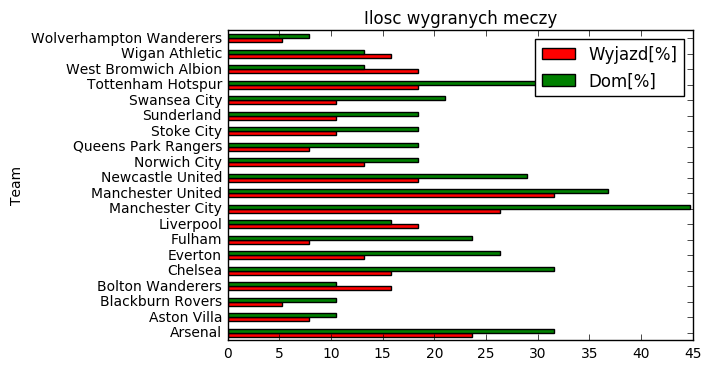

In [12]:
#Procent wygranych meczów rozgrywanych "u siebie" - która drużyna najlepiej wykorzystuje atut własnego boiska (wygrane mecze / rozegrane mecze).

team_ven6 = team_match.groupby(['Date','Team','Winning Goal','Venue']).size().reset_index()
team_ven6 = team_ven6.groupby(['Team','Venue','Winning Goal']).size().unstack(['Winning Goal','Venue']).reset_index()
team_ven6.columns=['Team',' ','Wyjazd',' ','Dom']
team_ven6 = team_ven6.iloc[:,[0,2,4]]

team_ven6['Wyjazd[%]']= team_ven6['Wyjazd']/38 *100
team_ven6['Dom[%]']= team_ven6['Dom']/38 *100
team_ven6.set_index('Team').plot(y = ['Wyjazd[%]','Dom[%]'],kind ='barh',color = ['r','g'], title='Ilosc wygranych meczy')

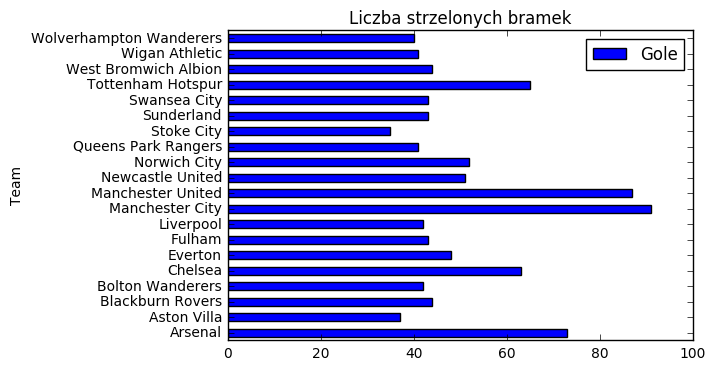

In [33]:
#ilość strzelonych bramek

team_ven = team_match.iloc[:,[2,4,5]]
team_ven = team_ven.groupby(['Team'])['Goals'].sum().reset_index()
team_ven['Gole'] = team_ven['Goals']
team_ven = team_ven.iloc[:,[0,2]]
team_ven.set_index('Team').plot(kind ='barh',color = 'b', title='Liczba strzelonych bramek')

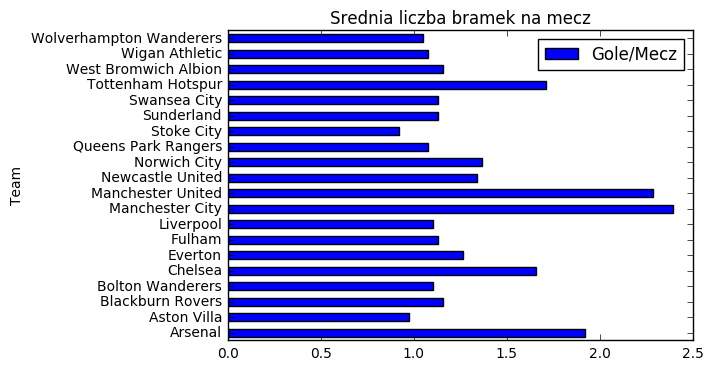

In [14]:
#Ile bramek pada średnio w meczach danej drużyny.

team_goals_av = data.iloc[:,[4,15,18]]

team_goals_av = team_goals_av.groupby(['Team'])['Goals'].sum().reset_index()
team_goals_av['Gole/Mecz'] = team_goals_av['Goals']/38

team_goals_av.set_index(['Team']).plot(y ='Gole/Mecz',kind ='barh', title='Srednia liczba bramek na mecz')

In [48]:
#Średnia liczba bramek strzelanych przez drużyny - można zrobić podział na mecze "u siebie" i "na wyjeździe" (Venue)

team_ven1 = team_match.iloc[:,[2,4,5]]

team_ven1 = team_ven1.groupby(['Team','Venue'])['Goals'].sum().unstack(['Venue']).reset_index()

team_ven4 = team_match.groupby(['Date','Team','Venue']).size().reset_index()
team_ven4 = team_ven4.iloc[:,[0,1,2]]
team_ven4 = team_ven4.groupby(['Team','Venue']).size().unstack(['Venue']).reset_index() 
#19 matches away and 19 matches home

team_ven1['Gole/MeczWyjazd'] = team_ven1['Away']/19
team_ven1['Gole/MeczDom'] = team_ven1['Home']/19

print('Średnia liczba bramek zdobytych w domu: ',team_ven1['Gole/MeczDom'].mean())
print('Średnia liczba bramek zdobytych na wyjeździe: ',team_ven1['Gole/MeczWyjazd'].mean())

Średnia liczba bramek zdobytych w domu:  1.52368421053
Średnia liczba bramek zdobytych na wyjeździe:  1.17368421053


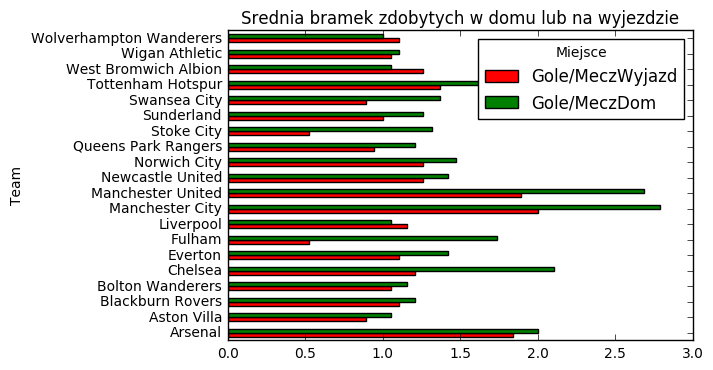

In [44]:
team_ven1.set_index(['Team']).plot(y = ['Gole/MeczWyjazd', 'Gole/MeczDom'], kind ='barh', color = ['r','g'],title='Srednia bramek zdobytych w domu lub na wyjezdzie')

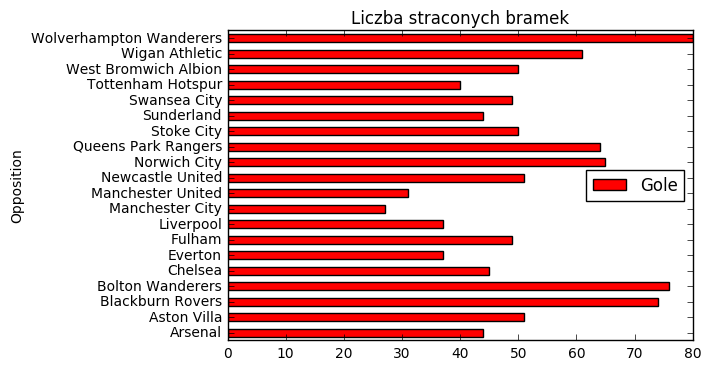

In [49]:
#ilość straconych bramek

team_ven = team_match.iloc[:,[3,4,5]]
team_ven = team_ven.groupby(['Opposition'])['Goals'].sum().reset_index()
team_ven['Gole'] = team_ven['Goals']
team_ven = team_ven.iloc[:,[0,2]]
team_ven.set_index('Opposition').plot(kind ='barh',color = 'r', title='Liczba straconych bramek')

In [18]:
#Średnia liczba bramek traconych przez drużyny - można zrobić podział na mecze "u siebie" i "na wyjeździe" (Venue).

team_los1 = team_match.iloc[:,[3,4,5]]
team_los1 = team_los1.groupby(['Opposition','Venue'])['Goals'].sum().unstack(['Venue']).reset_index()

#19 matches away and 19 matches home
team_los1['Gole/MeczWyjazd'] = team_los1['Away']/19
team_los1['Gole/MeczDom'] = team_los1['Home']/19

print('Średnia liczba bramek straconych w domu: ',team_los1['Gole/MeczDom'].mean())
print('Średnia liczba bramek straconych na wyjeździe: ',team_los1['Gole/MeczWyjazd'].mean())

Średnia liczba bramek straconych w domu:  1.52368421053
Średnia liczba bramek straconych na wyjeździe:  1.17368421053


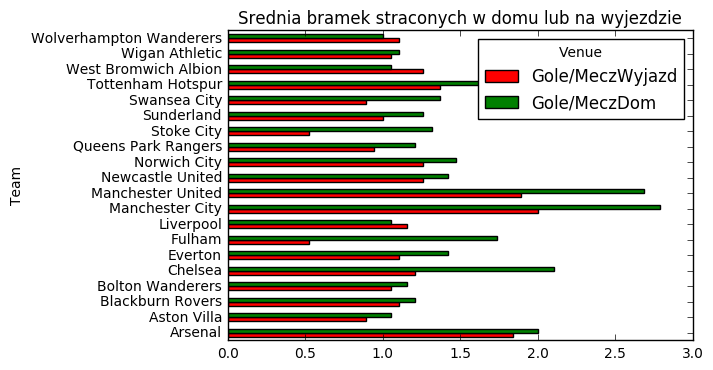

In [19]:
team_ven1.set_index(['Team']).plot(y = ['Gole/MeczWyjazd', 'Gole/MeczDom'], kind ='barh', color = ['r','g'],title='Srednia bramek straconych w domu lub na wyjezdzie')

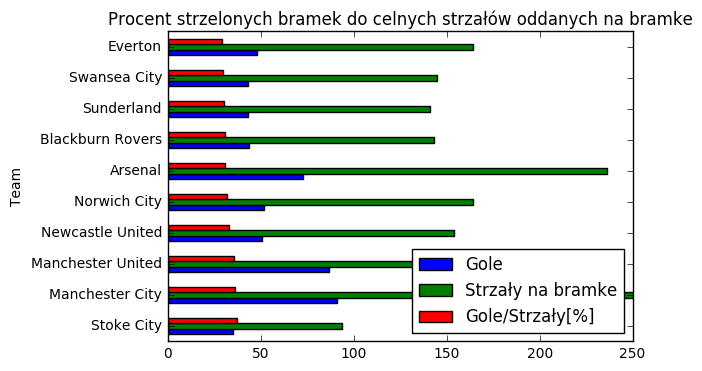

In [52]:
#Stosunek (%) strzelonych bramek (Goals) do celnych strzałów oddanych na bramkę (Shots On Target inc goals), 
#podział na drużyny (która drużyna jest najskuteczniejsza).

team_goals = data.iloc[:,[4,15,18]]

team_goals1 = team_goals.groupby(['Team'])['Goals'].sum()
team_goals2 = team_goals.groupby(['Team'])['Shots On Target inc goals'].sum()

team_goals3 = pd.concat([team_goals1, team_goals2],axis=1)
team_goals3['Strzały na bramke'] = team_goals3['Shots On Target inc goals']

team_goals3['Gole/Strzały[%]'] = team_goals3['Goals'] / team_goals3['Shots On Target inc goals'] * 100

team_goals3['Gole'] = team_goals3['Goals']

team_goals3.nlargest(10,'Gole/Strzały[%]').plot(y=['Gole','Strzały na bramke','Gole/Strzały[%]'],kind ='barh', title='Procent strzelonych bramek do celnych strzałów oddanych na bramke')

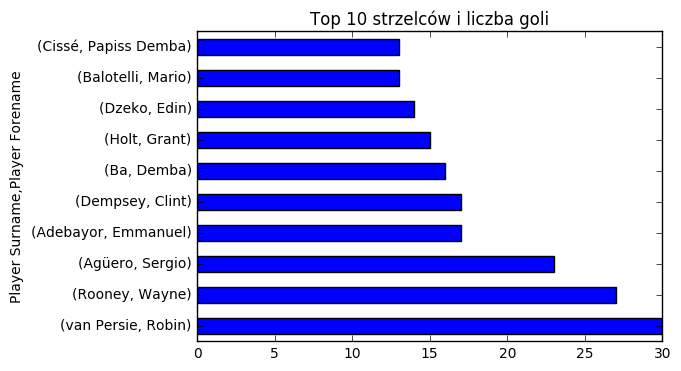

In [21]:
#top 10 strzelców
player_goals1 = data.iloc[:,[2,3,15,132]]

player_goals = player_goals1.groupby(['Player Surname', 'Player Forename'])['Goals'].sum()
player_goals = player_goals.sort_values(ascending=False)

player_goals.nlargest(10).plot(kind ='barh', title='Top 10 strzelców i liczba goli')

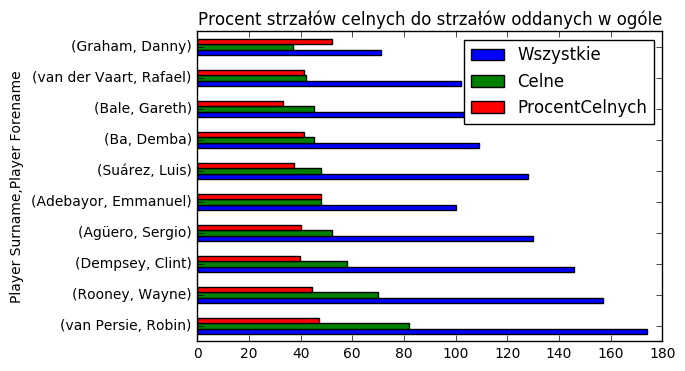

In [22]:
#Procent strzałów celnych (Shots On Target inc goals) do strzałów oddanych w ogóle (Shots On Target inc goals + Shots Off Target inc woodwork + Blocked Shots) 

shots = data.iloc[:,[2,3,18,19,20]]
shots = shots.groupby(['Player Surname', 'Player Forename'])['Shots On Target inc goals','Shots Off Target inc woodwork','Blocked Shots'].sum().reset_index()

shots['Wszystkie'] = shots['Shots On Target inc goals'] + shots['Shots Off Target inc woodwork'] +shots['Blocked Shots']
shots['Celne'] = shots['Shots On Target inc goals']
shots['ProcentCelnych'] = (shots['Shots On Target inc goals'] / shots['Wszystkie'] )* 100

shots = shots.iloc[:,[0,1,5,6,7]]
shots.set_index(['Player Surname', 'Player Forename']).nlargest(10,'Celne').plot(kind ='barh', title='Procent strzałów celnych do strzałów oddanych w ogóle')

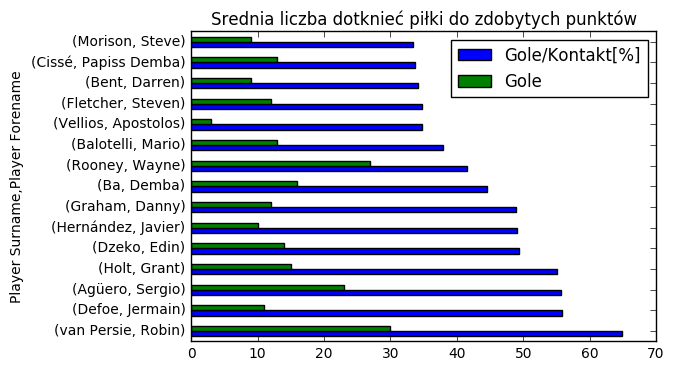

In [58]:
#top 10 strzelców
player_touches = data.iloc[:,[2,3,15,132]]
player_touches = player_goals1.groupby(['Player Surname', 'Player Forename'])['Touches'].mean()

player_t_goals = pd.concat([player_goals, player_touches],axis=1)

player_t_goals['Gole/Kontakt[%]'] = player_t_goals['Goals'] / player_t_goals['Touches'] * 100

player_t_goals['Gole'] = player_t_goals['Goals']
player_t_goals = player_t_goals.iloc[:,[2,3]]

player_t_goals.nlargest(15,'Gole/Kontakt[%]').plot(kind ='barh', title='Srednia liczba dotknieć piłki do zdobytych punktów')

                                Gole/Czas[%]  Gole  Czas w grze
Player Surname Player Forename                                 
van Persie     Robin               34.193161    30    87.736842
Rooney         Wayne               32.335329    27    83.500000
Agüero         Sergio              30.076923    23    76.470588
Dzeko          Edin                28.056112    14    49.900000
Holt           Grant               24.053452    15    62.361111
Balotelli      Mario               22.634368    13    57.434783
Defoe          Jermain             21.367521    11    51.480000
Ba             Demba               19.934042    16    80.264706
Adebayor       Emmanuel            19.753521    17    86.060606
Hernández      Javier              18.970190    10    52.714286
Dempsey        Clint               18.928679    17    89.810811
Berbatov       Dimitar             16.406250     7    42.666667
Cissé          Papiss Demba        16.352201    13    79.500000
Fletcher       Steven              16.31

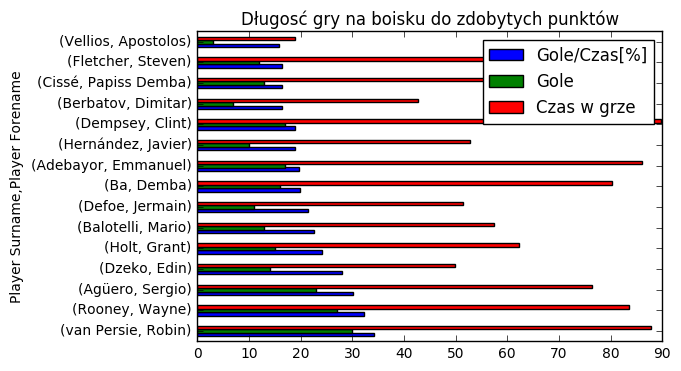

In [64]:
#time
player_goals2 = data.iloc[:,[2,3,15,11]]
player_time = player_goals2.groupby(['Player Surname', 'Player Forename'])['Time Played'].mean()
player_time = player_time.sort_values(ascending=False)

player_t_goals = pd.concat([player_goals, player_time],axis=1)

player_t_goals['Gole/Czas[%]'] = player_t_goals['Goals'] / player_t_goals['Time Played'] * 100

player_time = player_t_goals.nlargest(15,'Gole/Czas[%]')

player_time['Gole'] = player_time['Goals']
player_time['Czas w grze'] = player_time['Time Played']
player_time = player_time.iloc[:,[2,3,4]]
player_time.plot(kind ='barh', title='Długosć gry na boisku do zdobytych punktów')


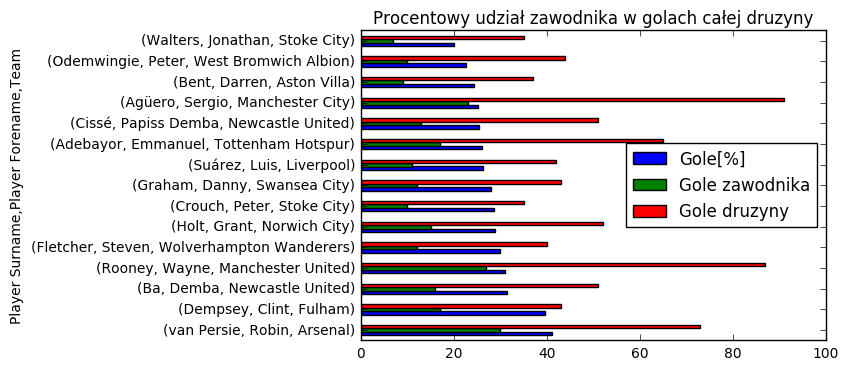

In [70]:
#Procentowy udział zawodnika w golach całej drużyny (strzelone gole przez zawodnika / strzelone gole przez 
#całą drużynę) - i tutaj też można wziąć pod uwagę top 10 (od najwyższego procenta do najmniejszego).

team_goal_player1 = data.iloc[:,[0,2,3,4,15]]
team_goal_player = team_goal_player1.groupby(['Team'])['Goals'].sum().reset_index()

team_goal_p = team_goal_player1.groupby(['Team','Player Surname', 'Player Forename'])['Goals'].sum().reset_index()
team_goal_p2 = pd.merge(team_goal_player, team_goal_p,
                       how='left', on=['Team'])

team_goal_p2['Gole[%]'] = team_goal_p2['Goals_y'] / team_goal_p2['Goals_x'] * 100
team_goal_p2['Gole druzyny'] = team_goal_p2['Goals_x']
team_goal_p2['Gole zawodnika'] = team_goal_p2['Goals_y']
team_goal_p2.nlargest(15,'Gole[%]').set_index(['Player Surname','Player Forename','Team']).plot( y = ['Gole[%]','Gole zawodnika','Gole druzyny'], kind ='barh', title='Procentowy udział zawodnika w golach całej druzyny')


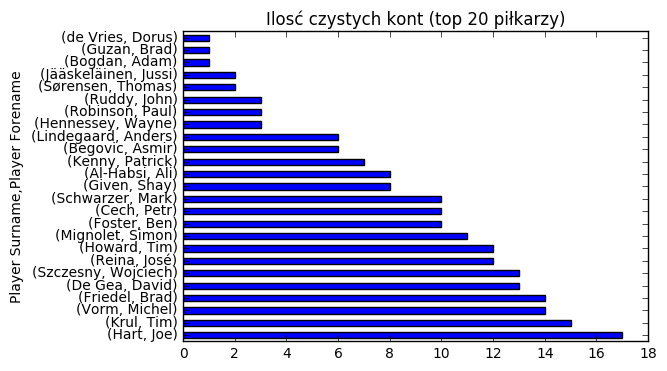

In [26]:
#Ilość (suma) czystych kont (Clean Sheets) - top 10 bramkarzy.

player_clean = data.iloc[:,[2,3,184]]

player_clean = player_clean.groupby(['Player Surname', 'Player Forename'])['Clean Sheets'].sum()
player_clean = player_clean.sort_values(ascending=False)

player_clean.nlargest(25).plot(kind ='barh', title='Ilosć czystych kont (top 20 piłkarzy)')

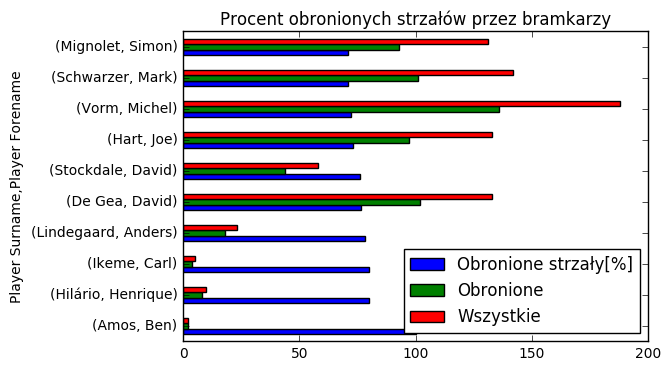

In [74]:
#Procent obronionych strzałów przez bramkarzy (Saves Made / Shots On Conceded) - top 10 bramkarzy.

player_saves = data.iloc[:,[2,3,173,189]]

player_saves1 = player_saves.groupby(['Player Surname', 'Player Forename'])['Saves Made'].sum().reset_index()
#player_saves = player_saves.sort_values(ascending=False)
player_saves2 = player_saves.groupby(['Player Surname', 'Player Forename'])['Shots On Conceded'].sum().reset_index()

player_saves3 = pd.concat([player_saves1, player_saves2],axis=1)

player_saves3['Obronione strzały[%]'] = player_saves3['Saves Made'] / player_saves3['Shots On Conceded'] * 100
player_saves3['Obronione'] = player_saves3['Saves Made']
player_saves3['Wszystkie'] = player_saves3['Shots On Conceded']
player_saves3 = player_saves3.iloc[:,[0,1,6,7,8]]
player_saves3.nlargest(10,'Obronione strzały[%]').set_index(['Player Surname','Player Forename']).plot(kind ='barh', title='Procent obronionych strzałów przez bramkarzy')
